## Read a netCDF file and make a contour plot with cartopy using a function

- see https://kpegion.github.io/Pangeo-at-AOES/examples/cartopy-tutorial.html

Choose kernel gloenv_py3.10

The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. **The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.**

In [1]:
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import time as t

In [2]:
begin = t.time()

In [3]:
def robinson_map(
    figsize, crs, crs_data, cmap, title, var_2D, lat_name, lon_name, nlev, land=None, ocean=None, borders=None, states=None):
  
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import cartopy.mpl.ticker as cticker
    from cartopy.util import add_cyclic_point
    import matplotlib.pyplot as plt
    import numpy as np

    if land is not None:
        ax.add_feature(cfeature.LAND, facecolor=land)
    if ocean is not None:
        ax.add_feature(cfeature.OCEAN, facecolor=ocean)
    if borders is not None:
        ax.add_feature(cfeature.BORDERS, linewidth=borders)
    if states is not None:
        ax.add_feature(cfeature.STATES, linewidth=states)
        
    # Make the size of the figure
    fig = plt.figure(figsize=(figsize,figsize))

    # Set the axes using the specified map projection
    ax=plt.axes(projection=crs)
    ax.set_global()

    # Add cyclic point to data (to avoid a blank line)
    data=var_2D
    data, lons = add_cyclic_point(data, coord=var_2D[lon_name])

    # Set the proper ticks for a Cartopy map
    min_lat = -60
    max_lat = 61
    min_lon = -180
    max_lon = 181
    
    # The Robinson projection works with gridlines not (xaxis, yaxis)
    # Add gridlines
    ax.gridlines(
        draw_labels=True, 
        xlocs=range(min_lon, max_lon, 90), 
        ylocs=range(min_lat, max_lat, 30), 
        color='k',)

    # Make a filled contour plot
    # # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
    # Transform corresponds tells Cartopy what coordinate system the data are defined in
    # Add a colomap
    min_var=np.min(data)
    max_var=np.max(data)
    clevs=np.arange(min_var,max_var,nlev)
    cs=ax.contourf(lons, var_2D[lat_name], data, clevs,
               transform = crs_data,cmap=cmap,extend='both')

    # Add coastlines
    ax.coastlines()
    
    # Add colorbar
    cbar = plt.colorbar(cs,shrink=0.8,orientation='horizontal',label=title)

    # Plot the figure
    plt.show()

In [4]:
var_ini_3D='ua'
ds=xr.open_mfdataset('/archive/globc/datamg/globc_obs/ERAI_1979-2018/'+var_ini_3D+'_1d_3D/'+var_ini_3D+'*.nc')


In [5]:
ds[var_ini_3D]

<xarray.DataArray 'ua' (time: 14610, level: 37, latitude: 121, longitude: 240)>
dask.array<concatenate, shape=(14610, 37, 121, 240), dtype=float32, chunksize=(366, 37, 121, 240), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
  * latitude   (latitude) float32 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1

In [6]:
niveau = 200
var_level = ds.sel(level=niveau)
var=var_level['ua'].isel(time=0)

#### Plot 2D data using cartopy

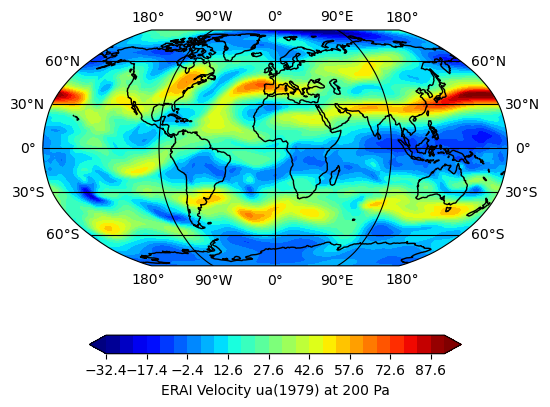

In [7]:
robinson_map(
    6., ccrs.Robinson(central_longitude=0, globe=None), ccrs.PlateCarree(), 'jet', 'ERAI Velocity ua(1979) at 200 Pa', var, 'latitude', 'longitude', 5, land=None, ocean=None, borders=None, states=None
)

In [8]:
end = t.time()
print('Runtime to calculate the weights is', '{0:.1f}'.format(end - begin), 's')

Runtime to calculate the weights is 28.4 s
